In [1]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
series=read_csv('water.csv',header=0,index_col=0,parse_dates=True)

In [3]:
series

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587


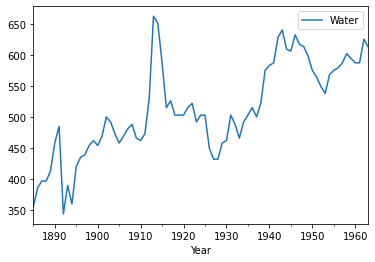

In [4]:
# line plot of time series
from pandas import read_csv
series.plot()
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011F08700>]],
      dtype=object)

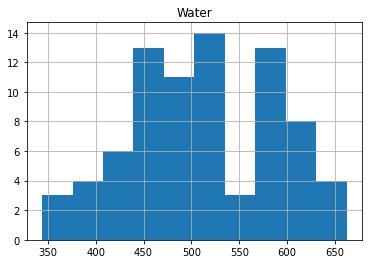

In [6]:
series.hist()

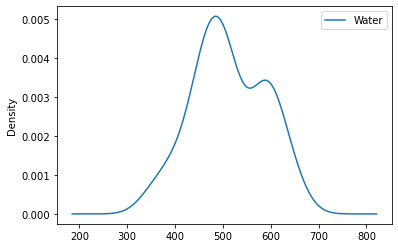

In [7]:
series.plot(kind='kde')

In [8]:
# separate out a validation dataset
split_point=len(series)-10
dataset,validation=series[0:split_point],series[split_point:]
print('Dataset %d, Validation %d '%(len(dataset),len(validation)))
dataset.to_csv('dataset.csv',header=False)
validation.to_csv('validation.csv',header=False)

Dataset 69, Validation 10 


Persistence/ Base model

In [10]:
#evaluatte a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

#load data
train= read_csv('dataset.csv',header=None,index_col=0,parse_dates=True,squeeze=True)

# prepare data
X=train.values
X=X.astype('float32')
train_size=int(len(X) * 0.50)
train, test=X[0:train_size],X[train_size:]

ARIMA Hyperparameters

In [12]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X=X.astype('float32')
    train_size=int(len(X)*0.50)
    train, test=X[0:train_size],X[train_size:]
    history=[x for x in train]
# make predictions
    predictions= list()
    for t in range(len(test)):
        model=ARIMA(history, order=arima_order)

# model_fit = model.fit(disp=0)
    model_fit=model.fit(disp=0)
    yhat=model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
    
    # calculate out of sample error
    
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

Grid search for p,d,q values

In [13]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [14]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

# Build Model based on the optimized values

In [17]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [18]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

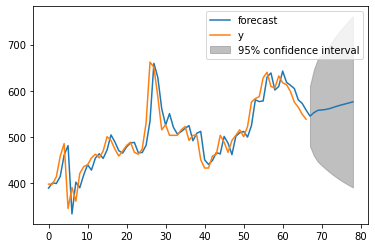

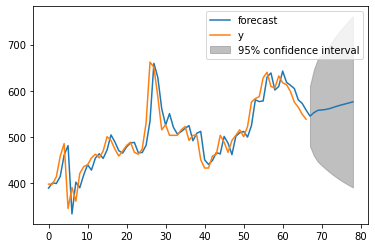

In [19]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [20]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

33.40127638941534

Combine train and test data and build final model¶

In [21]:
# fit model
data = read_csv('water.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [22]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

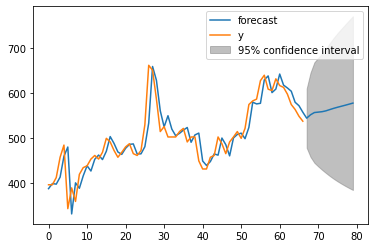

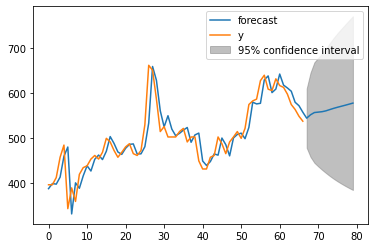

In [23]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [24]:
forecast

array([544.72232931, 552.23283532, 557.19513257, 558.14337812,
       559.09480627, 560.98754101, 563.77812345, 566.49329221,
       568.91502789, 571.14167675])